In [0]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, Y = datasets.make_blobs(n_samples = n_pts, random_state=123, centers=centers, cluster_std=0.5)
x_data = torch.tensor(X)
y_data = torch.tensor(Y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[Y==0, 0], X[Y==0, 1])
  plt.scatter(X[Y==1, 0], X[Y==1, 1])

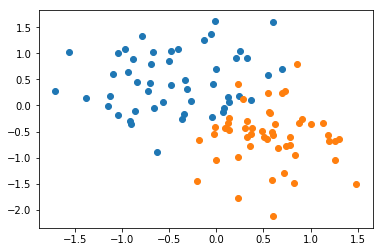

In [4]:
scatter_plot()

In [0]:
import torch.nn as nn

class Model(nn.Module):

  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, X):
    pred = torch.sigmoid(self.linear(X))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [6]:
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.0645, 0.6376]], requires_grad=True), Parameter containing:
tensor([-0.1838], requires_grad=True)]


In [0]:
w, b = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
  return (w1.item(), w2.item(), b1.item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  # 0 = w1*x1 + w2*x2 + b
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

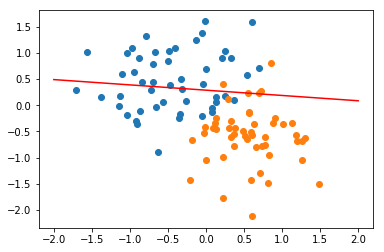

In [9]:
plot_fit('Untrained model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [11]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data.float())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(losses[-10:])

[0.3073616921901703, 0.3072330355644226, 0.30710476636886597, 0.30697670578956604, 0.3068487048149109, 0.3067210614681244, 0.30659347772598267, 0.3064662218093872, 0.3063391447067261, 0.3062122166156769]


Text(0.5, 0, 'epochs')

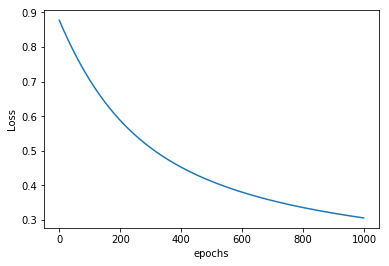

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

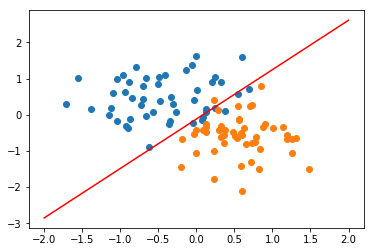

In [13]:
plot_fit("Trained Model")

Red point positive probability = 1
Black point positive probability = 0


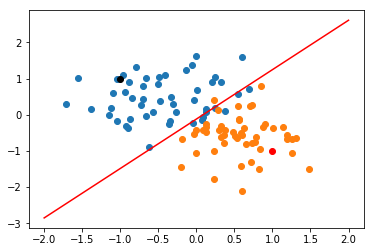

In [14]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.predict(point1)))
print("Black point positive probability = {}".format(model.predict(point2)))
plot_fit('Trained Model')